Sharpening Filters

1.	Write a program for edge detection using following methods: <br>
•	Roberts <br> 
•	Prewitt <br>
•	Sobel <br>
•	Canny <br>
<br>
Study the effect of these filters over input image and compare the results.


In [2]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.data import camera  # sample input image
from skimage import filters, feature

(512, 512)


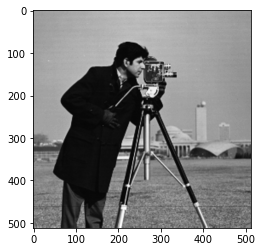

In [63]:
# displaying the original image

img = camera()
print(img.shape)
plt.imshow(img, cmap = 'gray')

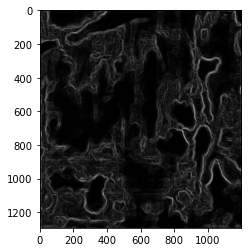

In [5]:
pic = cv2.imread('data/pic.jpg')
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
pic_edge = filters.sobel(pic)
plt.imshow(pic_edge, cmap = 'gray')

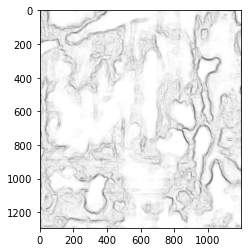

In [6]:
pic_edge = 255 - pic_edge
plt.imshow(pic_edge, cmap = 'gray')

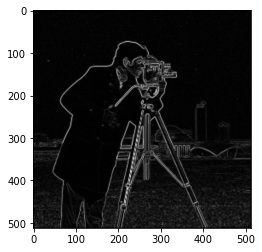

In [3]:
# edge detection using roberts.

edge_roberts = filters.roberts(img)
plt.imshow(edge_roberts, cmap = 'gray')

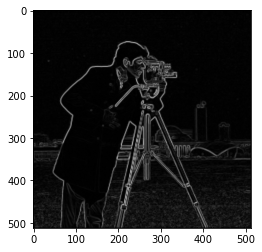

In [4]:
# edge detection using Prewitt.

edge_prewitt = filters.prewitt(img)
plt.imshow(edge_prewitt, cmap = 'gray')

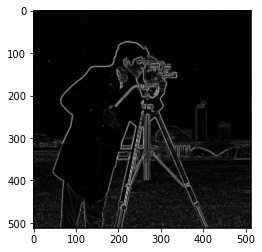

In [5]:
# edge detection using Sobel.

edge_sobel = filters.sobel(img)
plt.imshow(edge_sobel, cmap = 'gray')

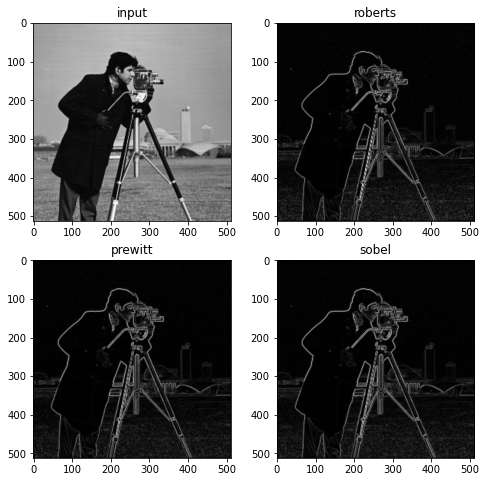

In [8]:
images = [img, edge_roberts, edge_prewitt, edge_sobel]
names = ["input", "roberts", "prewitt", "sobel"]
fig = plt.figure(figsize = (8, 8))
for i in range(4):
    fig.add_subplot(2, 2, i + 1)
    plt.title(names[i])
    plt.imshow(images[i], cmap = 'gray')

In [11]:
# edge detection using Canny.
sigma = [1, 3, 5, 10]
edge_canny = []
for sig in sigma:
    edge_canny.append(feature.canny(img, sigma = sig))

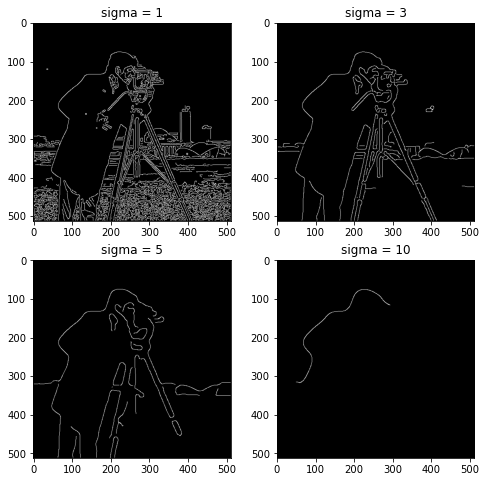

In [12]:
# Various Sigma for Canny edge Detectors
fig = plt.figure(figsize = (8, 8))
for i in range(4):
    fig.add_subplot(2, 2, i + 1)
    plt.title('sigma = ' + str(sigma[i]))
    plt.imshow(edge_canny[i], cmap = 'gray')

In [13]:
# comparing prewitt and sobel and roberts

from skimage.util import compare_images

diff_prewitt_sobel = compare_images(edge_prewitt, edge_sobel)
diff_prewitt_roberts = compare_images(edge_prewitt, edge_roberts)
diff_roberts_sobel = compare_images(edge_roberts, edge_sobel)

In [14]:
max_diff = np.max(np.maximum(diff_prewitt_sobel, diff_prewitt_roberts))
print(max_diff)

0.3419493680821095


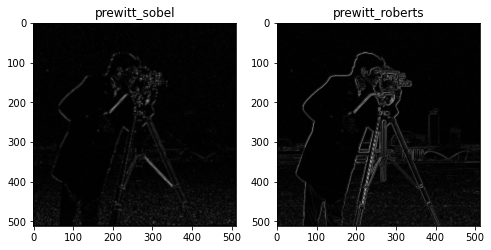

In [15]:
fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1, 2, 1)
plt.title("prewitt_sobel")
plt.imshow(diff_prewitt_sobel, cmap = 'gray')

fig.add_subplot(1, 2, 2)
plt.title("prewitt_roberts")
plt.imshow(diff_prewitt_roberts, cmap = 'gray')

2.	Compare the results obtained by following two approaches. <br>
a)	Edge detection using Laplacian mask <br>


In [64]:
# edge detection using Laplacian Mask

from scipy import misc, signal
from scipy import ndimage, misc
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

img = rgb2gray(img).astype(float)

print(np.max(img))
print(img.shape)

255.0
(512, 512)


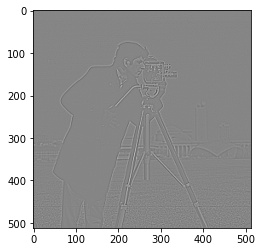

In [65]:
# defining the Laplacian Mask / kernel

edge_laplacian = filters.laplace(img)
plt.imshow(edge_laplacian, cmap = 'gray')

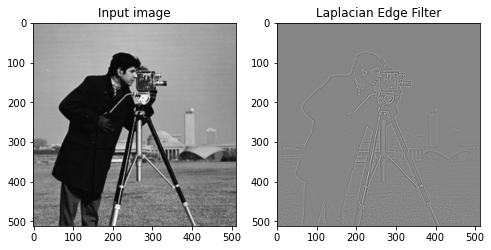

In [66]:
fig = plt.figure(figsize = (8, 8))

fig.add_subplot(1, 2, 1)
plt.title("Input image")
plt.imshow(img, cmap = 'gray')

fig.add_subplot(1, 2, 2)
plt.title("Laplacian Edge Filter")
plt.imshow(edge_laplacian, cmap = 'gray')

b)	Apply Gaussian followed by Laplace to study LoG filter. <br>Does it show an improvement? Justify

(-0.5, 511.5, 511.5, -0.5)

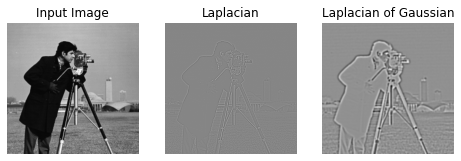

In [69]:
from scipy import ndimage

plt.figure(figsize = (8, 8))

img_LOG = ndimage.gaussian_laplace(img, sigma = 3)

plt.subplot(131)
plt.imshow(img, cmap = 'gray')
plt.title("Input Image")
plt.axis('off')

plt.subplot(132)
plt.imshow(edge_laplacian, cmap = 'gray')
plt.title("Laplacian")
plt.axis('off')

plt.subplot(133)
plt.imshow(img_LOG, cmap = 'gray')
plt.title("Laplacian of Gaussian")
plt.axis('off')

Note : We can very well notice that Laplacian of Gaussian enhances the image by a very good margin.
The final image looks awesome.

3.	Combining Spatial Enhancement Methods

Follow these steps: <br>
a)	Read an input image (grayscale) <br>
b)	Laplacian of a) <br>
c)	Add a) and b). By this, sharpened image will be obtained <br>
d)	Sobel of a) <br>
e)	Sobel image smoothed with a 5*5 averaging filter <br>
f)	Mask image formed by the product of (c) and (e). <br>
g)	Sharpened image obtained by the sum of (a) and (f). <br>


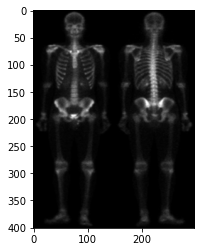

In [48]:
# a) Read an input image.

img = cv2.imread("data/comb.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = 'gray')

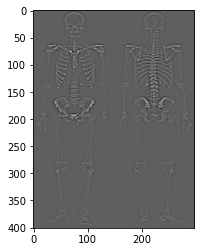

In [53]:
# b) Laplacian of a.

img_laplacian = filters.laplace(img)
plt.imshow(img_laplacian, cmap = 'gray')

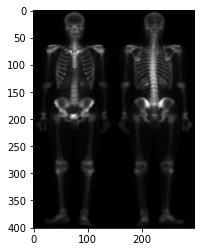

In [54]:
# c) Add a and b, by this sharpened image will be obtained.

img_add = img + img_laplacian
plt.imshow(img_add, cmap = 'gray')

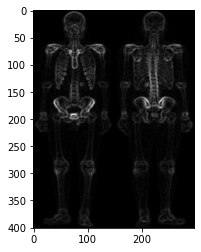

In [55]:
# d) Sobel of a.

img_sobel = filters.sobel(img)
plt.imshow(img_sobel, cmap = 'gray')

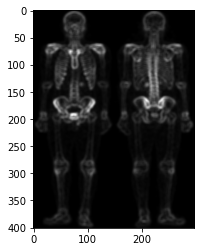

In [56]:
# e) Sobel image smoothed with 5x5 averaging filter.

img_sobel_avg = cv2.blur(img_sobel, (5, 5))
plt.imshow(img_sobel_avg, cmap = 'gray')

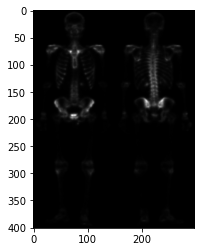

In [57]:
# f) Mask image formed by the product of c and e.

img_prod = cv2.multiply(img_add, img_sobel_avg)
plt.imshow(img_prod, cmap = 'gray')

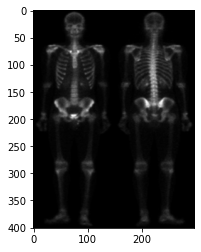

In [58]:
# g) Sharpened image obtained by the sum of a and f.

img_sharpened = img + img_prod 
plt.imshow(img_sharpened, cmap = 'gray')

(-0.5, 296.5, 400.5, -0.5)

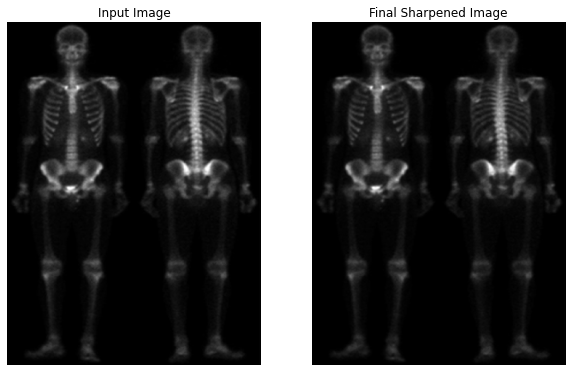

In [60]:
plt.figure(figsize = (10, 10))

plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title("Input Image")
plt.axis('off')

plt.subplot(122)
plt.imshow(img_sharpened, cmap = 'gray')
plt.title("Final Sharpened Image")
plt.axis('off')